### <span style="color:blue"> ***Score: 100*** </span>

### Machine Learning Assignment 03
* weihaoli
* 05/05/2017

In [1]:
import numpy as np

#sigmoid fuction
sigmoid = lambda x: 1/(1+np.exp(-x))
dsigmoid = lambda x: sigmoid(x) * (1-sigmoid(x))
F = 2

%pylab notebook

#generate data
def get_test_data(num_pts):
    centers = [(0, 0, 1), (1, 1, -1), (1, -1, 1), (-2, 0, -1), (4, 1, 1)]
    X = np.random.rand(num_pts, 2)*10 - 5
    
    def get_y(x):
        distances = [np.sqrt(np.sum((x - c[:2])**2)) for c in centers] 
        which = np.argmin(distances)
        return centers[which][2] * distances[which]
    
    Y = np.array([get_y(x) for x in X]) 
    return X,Y

Populating the interactive namespace from numpy and matplotlib


In [2]:
class neural_network:
    """
    a simple three layer nn
    """
    
    
    def __init__(self,nb_node,features):
        """
        initialized the nn
        
        nb_node :number of neurons in the hiddent layer 
        features : number of input features
        """
        # initialized weight, with an extra one assign to the bias
        self.w_h1 = np.random.rand(1,features+1)[0]
        self.w_h2 = np.random.rand(1,features+1)[0]
        self.w_h3 = np.random.rand(1,features+1)[0]
        self.w_o  = np.random.rand(1,nb_node+1)[0]
        self.is_trained = False
        
    def fit(self,x,y,eta,epoch):
        self.is_trained = True
        """
        Given x,y, learning rate, epoch, training a neural network,recording MSE meanwhile
        
        x,y: array-like inputs
        eta: learning rate
        epoch: number of iteration
        """
        
        self.is_train = True
        self.in_sample_mse = np.array([1.0]*epoch)
        num_of_sample = x.shape[0]
        # append the bias term   
        x_temp = np.ones((num_of_sample,3))
        x_temp[:,:-1] = x
        x = x_temp
        
        
        
        for i in range(epoch):
            
            """
            Going forward
            """
            
            #input from x to hidden layer h
            z_h1 = x.dot(self.w_h1.T)
            z_h2 = x.dot(self.w_h2.T)
            z_h3 = x.dot(self.w_h3.T)

            #output of hidden layer
            y_h1 = sigmoid(z_h1)
            y_h2 = sigmoid(z_h2)
            y_h3 = sigmoid(z_h3)
            y_h = np.vstack((y_h1,y_h2,y_h3)).T
            
            #output-layer:taking signal from hindden layer, calculate via sigmoid,and output
           
            y_h_temp = np.ones((num_of_sample,4))
            y_h_temp[:,:-1] = y_h
            y_h = y_h_temp
            
            z_o = y_h.dot(self.w_o.T)
            y_o = z_o #  use linear instead of sigmoid(z_o)
            
            
            """
            Back propagation
            """

            #update weight for the weights in output layer, z_o denote input to out-layer
            #loss function
            self.in_sample_mse[i] = (y_o-y).dot((y_o-y).T)/(1.0*num_of_sample)
            
            de_dyo = 2*(y_o-y)/(1.0*num_of_sample)
            de_dzo = de_dyo   #instead of (1-y_o)*y_o*de_dyo
            dzo_dwo = y_h
            de_dwo =  de_dzo.dot(dzo_dwo)
            self.w_o -= eta*de_dwo

            #update weight for the weights in hidden layer
            de_dyh1 = self.w_o[0]*de_dzo
            de_dyh2 = self.w_o[1]*de_dzo
            de_dyh3 = self.w_o[2]*de_dzo


            dyh1_dzh1= (1-y_h1)*(y_h1)
            dyh2_dzh2= (1-y_h2)*(y_h2)
            dyh3_dzh3= (1-y_h3)*(y_h3)

            dzh1_dwh1 = x
            dzh2_dwh2 = x
            dzh3_dwh3 = x

            de_dw1 = (de_dyh1*dyh1_dzh1).dot(dzh1_dwh1)
            de_dw2 = (de_dyh2*dyh2_dzh2).dot(dzh3_dwh3)
            de_dw3 = (de_dyh2*dyh2_dzh2).dot(dzh3_dwh3)

            self.w_h1 -= eta*de_dw1
            self.w_h2 -= eta*de_dw2
            self.w_h3 -= eta*de_dw3
            
    def predict(self,x):
        """
        Given trained neural network, predict a set of x
        """
        assert self.is_trained
        
        x = np.array([np.append(sample,1) for sample in x])
        
        #input to hidden layer
        z_h1 = x.dot(self.w_h1.T) 
        z_h2 = x.dot(self.w_h2.T)
        z_h3 = x.dot(self.w_h3.T)

        #output of hidden layer
        y_h1 = sigmoid(z_h1)
        y_h2 = sigmoid(z_h2)
        y_h3 = sigmoid(z_h3)


        #input to output layer
        y_h = np.vstack((y_h1,y_h2,y_h3)).T
        y_h_temp = np.ones((num_of_sample,4))
        y_h_temp[:,:-1] = y_h
        y_h = y_h_temp
        z_o = y_h.dot(self.w_o.T)
        y_o = z_o#sigmoid(z_o)
        
        return y_o
            




In [3]:
### %matplotlib inline
np.random.seed(1314)
x_in, y_in = get_test_data(50000)

x_out, y_out = get_test_data(50000)

etas = [0.45,0.05,0.1,0.15,0.3,0.4]

mse = []

nn = neural_network(3, 2)
eta = 2
epoch = 80

for i,eta in enumerate(etas):
    nn = neural_network(3, 2)
    nn.fit(x_in, y_in,eta,epoch)
    mse.append(nn.in_sample_mse)
    

    

    

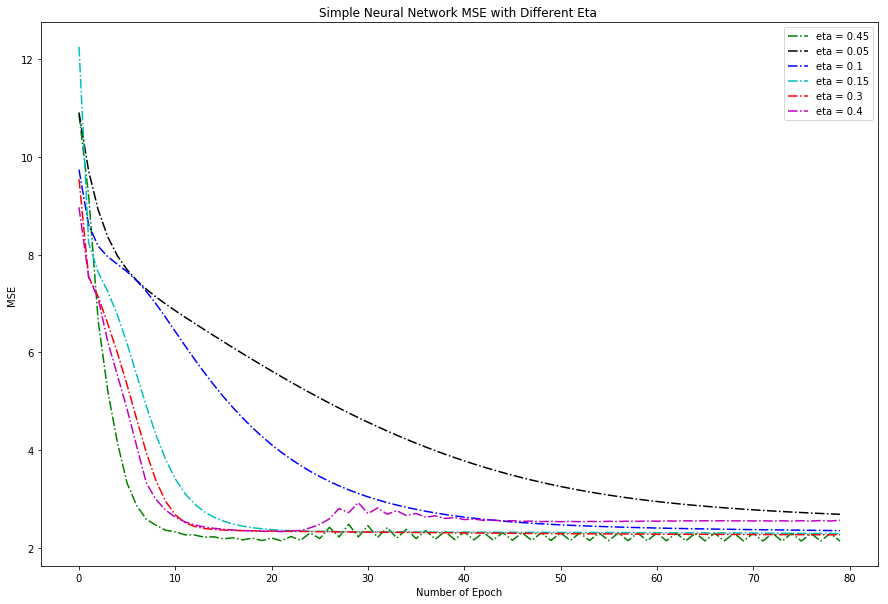

In [4]:
%matplotlib inline
color = ['g','k','b','c','r','m']

fig = plt.figure(figsize=(15,10))
for i,eta in enumerate(etas):
    plt.plot(range(epoch), mse[i], color[i], ls='dashdot', label="eta = " +str(eta))

plt.legend()
plt.xlabel("Number of Epoch")
plt.ylabel("MSE")
plt.title("Simple Neural Network MSE with Different Eta ")